### Loading Libraries

In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display
import random

import os
from PIL import Image
import csv

# sklearn Preprocessing
from sklearn.model_selection import train_test_split
#Keras
import tensorflow as tf
import keras
import warnings
warnings.filterwarnings('ignore')
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras import models
from keras.models import Sequential
from keras import optimizers
from keras.layers import BatchNormalization
from keras.utils import load_img,img_to_array


from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
#os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from sklearn.metrics import ConfusionMatrixDisplay


In [64]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession
# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [65]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

### Loading sample image


In [66]:
# image_path='data/split_6/train/Blues/Blues028-3.png'
# image = Image.open(image_path)

In [67]:
# print(image.format)
# print(image.size)
# print(image.mode)
# np.shape(image)

### Loading train/val/test sets

In [89]:
#image_dir='data/spectrograms_10sec'
dest_dir='../image_data/set-8-1-1'

train_dir = dest_dir+"/train/"
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(100,100),
                                                    color_mode="rgba",class_mode='categorical',batch_size=18580)


val_dir = dest_dir+"/val/"
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(val_dir,target_size=(100,100),
                                                color_mode='rgba',class_mode='categorical',batch_size= 2319)

test_dir = dest_dir+"/test/"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(100,100),
                                                  color_mode='rgba',class_mode='categorical',batch_size= 2326)


Found 18580 images belonging to 14 classes.
Found 2319 images belonging to 14 classes.
Found 2326 images belonging to 14 classes.


In [90]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

### Reshaping Data

In [92]:
import pickle
image_list = [[train_images, train_labels], [test_images,test_labels], [val_images,val_labels]]
file_name = "images_large811_6.pkl"


with open(file_name, "wb") as f:
    pickle.dump(image_list, f)
 
# train_im_list=image_list[0]

# with open('test_images.pkl', "wb") as f:
#     pickle.dump(image_list[1], f)
    
# with open('val_images.pkl', "wb") as f:
#     pickle.dump(image_list[2], f)


In [93]:
# import pickle
# file_name = "images_large811_6.pkl"
# with open(file_name, "rb") as f:
#     saved_images=pickle.load(f)



/d/Python/FLATIRON/Audio/notebooks


In [37]:
# train_images, train_labels = saved_images[0]
# test_images, test_labels = saved_images[1]
# val_images, val_labels = saved_images[2]

# train_labels.shape

In [38]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)


(993, 10000)
(342, 10000)
(329, 10000)


In [39]:
train_img.shape
#train_img.shape

(993, 10000)

### Reshaping y data

In [40]:
train_y=np.array([np.argmax(i) for i in train_labels]).reshape(train_generator.samples,1)
test_y=np.array([np.argmax(i) for i in test_labels]).reshape(test_generator.samples,1)
val_y=np.array([np.argmax(i) for i in val_labels]).reshape(val_generator.samples,1)


print(train_y.shape)
print(test_y.shape)
print(val_y.shape)

(993, 1)
(342, 1)
(329, 1)


### Exploring data

In [41]:
print ("Number of training samples: " + str(train_img.shape[0]))
print ("Number of testing samples: " + str(test_img.shape[0]))
print ("Number of validation samples: " + str(val_img.shape[0]))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 993
Number of testing samples: 342
Number of validation samples: 329
train_images shape: (993, 50, 50, 4)
train_labels shape: (993, 14)
test_images shape: (342, 50, 50, 4)
test_labels shape: (342, 14)
val_images shape: (329, 50, 50, 4)
val_labels shape: (329, 14)


## Building a Network

In [42]:

# model = Sequential()
# model.add(layers.Conv2D(64, kernel_size=(4, 4),
#                  activation='relu',
#                  input_shape=(train_img.shape[1],)))

# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Conv2D(64, (3, 5), activation='relu'
#                 , kernel_regularizer=regularizers.l2(0.04)
#                 ))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Dropout(0.2))

# model.add(layers.Conv2D(64, (2, 2), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Dropout(0.2))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.04)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.04)))
# model.add(layers.Dense(num_genres, activation='softmax'))
# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
#               metrics='accuracy')

In [43]:
train_images.shape[1:]
train_y.shape

(993, 1)

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',
                        input_shape=(train_images.shape[1:])))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))


# model.add(layers.Conv2D(64, (2, 2), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(14, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


# model = models.Sequential()
# model.add(layers.Conv2D(16, (3, 3), activation='relu',
#                         input_shape=(train_images.shape[1:])))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.2))


# model.add(layers.Conv2D(16, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.1))

# model.add(layers.Conv2D(8, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Flatten())
# model.add(layers.Dense(8, activation='relu'))
# model.add(layers.Dense(6, activation='softmax'))

# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer="adam",
#               metrics=['accuracy'])

In [49]:
checkpoint = [ #EarlyStopping(monitor='loss', min_delta=0.0001, patience=5, verbose=0, mode='auto'), 
                  ModelCheckpoint(filepath='models/best_model_cnn_6sec_11genres_.h5', monitor='accuracy', save_best_only=True)]



In [50]:

history = model.fit(train_images,
                    train_y,
                    epochs=1000,
                    batch_size=512, callbacks=checkpoint,
                    validation_data=(val_images, val_y) )




NameError: name 'train_y' is not defined

In [57]:
model.save("models/model_6sec_14genres_split_100_62_acc_CNN")

INFO:tensorflow:Assets written to: models/model_6sec_14genres_split_100_62_acc_CNN\assets


INFO:tensorflow:Assets written to: models/model_6sec_14genres_split_100_62_acc_CNN\assets


In [143]:
score_test = model.evaluate(test_images, test_y, verbose=0)
print("Testing Accuracy: ", score_test[1])
print("Testing Cross Entropy: %.2f" % score_test[0])

score_test = model.evaluate(val_images, val_y, verbose=0)
print("Val Accuracy: ", score_test[1])
print("Val Cross Entropy: %.2f" % score_test[0])

Testing Accuracy:  0.508873462677002
Testing Cross Entropy: 1.62
Val Accuracy:  0.5246219635009766
Val Cross Entropy: 1.61


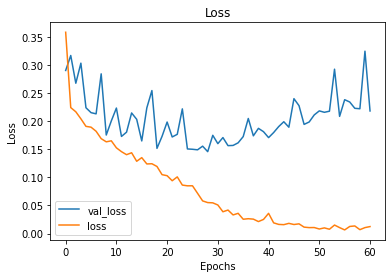

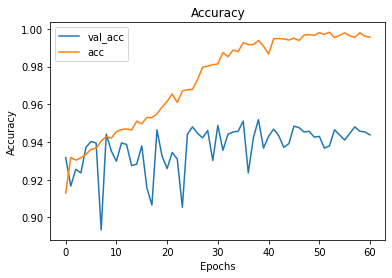

In [25]:
visualize_training_results(history)

In [81]:
test_prob=model.predict_generator(test_images)

In [85]:
y_pred=np.argmax(test_prob, axis=1)

In [91]:
set(y_pred)

{0, 1}

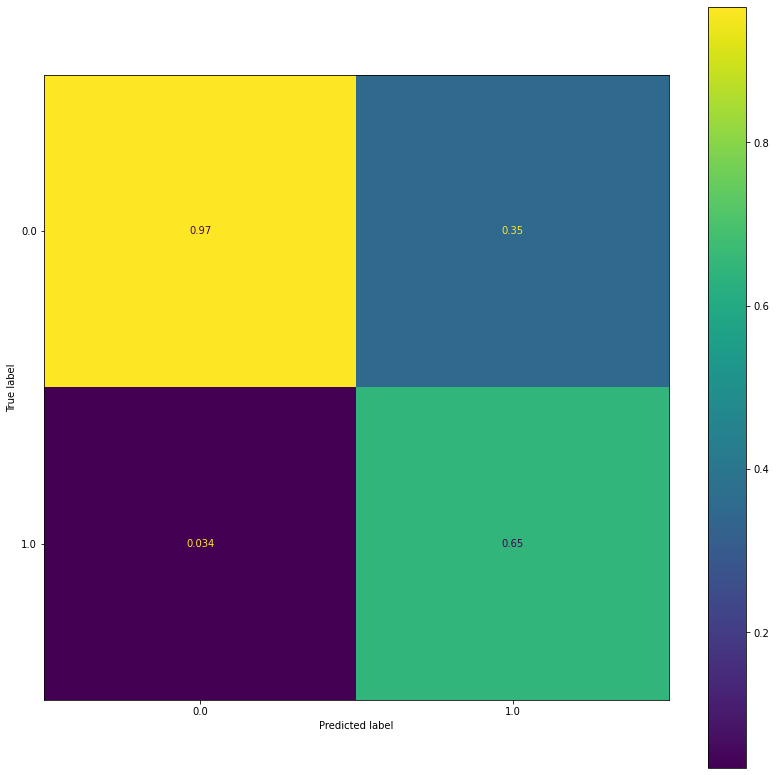

In [67]:
fig, ax = plt.subplots(figsize=(14,14))
ConfusionMatrixDisplay.from_predictions(test_y.flatten(), y_pred,  ax=ax, normalize='pred')